In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
x_path = './Data/train.csv'
X_train = pd.read_csv(x_path)

In [3]:
x_path = './Data/test.csv'
X_test = pd.read_csv(x_path)

In [4]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


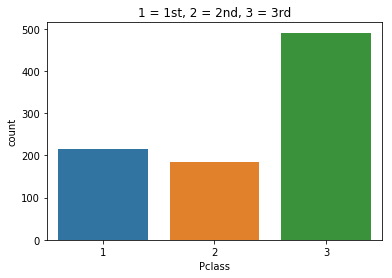

In [5]:
p = sns.countplot(data=X_train, x='Pclass')
_ = plt.title('1 = 1st, 2 = 2nd, 3 = 3rd')

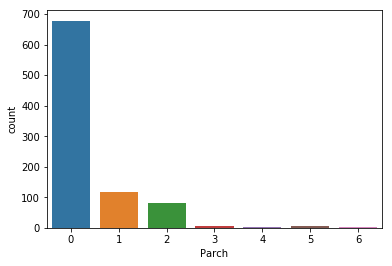

In [6]:
p = sns.countplot(data=X_train, x='Parch')

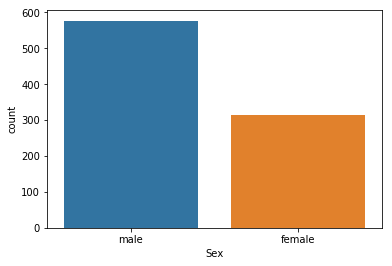

In [7]:
p = sns.countplot(data=X_train, x='Sex')

In [8]:
Y_train = X_train['Survived']

In [9]:
X_train["Cabin"] = X_train["Cabin"].fillna('NA')
X_test["Cabin"] = X_test["Cabin"].fillna('NA')

In [10]:
X_train['#Cabins'] = X_train['Cabin'].apply(lambda x: len(x))
X_test['#Cabins'] = X_test['Cabin'].apply(lambda x: len(x))

In [11]:
X_train['title'] = X_train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
X_train["title"] = X_train["title"].fillna("NA")

In [12]:
X_test['title'] = X_test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
X_test["title"] = X_test["title"].fillna("NA")

Survival score

In [13]:
X_train["Age"] = X_train["Age"].fillna(0.1)
X_test["Age"] = X_test["Age"].fillna(0.1)

In [14]:
X_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,  0.1 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [15]:
bins = [0, 18, 40, 50, 70,100]
names = ['0', '1', '2', '3','4']
X_train['AgeRange'] = pd.cut(X_train['Age'], bins, labels=names, include_lowest = True)
X_test['AgeRange'] = pd.cut(X_test['Age'], bins, labels=names, include_lowest = True)


In [16]:
X_train['AgeRange'].unique()

[1, 0, 3, 2, 4]
Categories (5, object): [0 < 1 < 2 < 3 < 4]

In [17]:
def sscore (cols):
    Sex=cols[0]
    AgeRange=cols[1]
    Parch=cols[2]
    if AgeRange=='0' and Parch == "0":
        return 1000
    elif AgeRange=='1' and Sex=="male": # 18-39
        return 1
    elif AgeRange=='2' and Sex=='male': #40-50
        return 1
    elif AgeRange=='0' and Sex=='male': #0-17
        return 100
    elif AgeRange=='3' and Sex=='male': #50-69
        return 10
    elif AgeRange=='4' and Sex=='male': #70 - 100
        return 10
    elif AgeRange=='1' and Sex=="female": #18-35
        return 10
    elif AgeRange=='2' and Sex=='female': #40-50
        return 100
    elif AgeRange=='0' and Sex=='female': #0-17
        return 100
    elif AgeRange=='3' and Sex=='female': #50-69
        return 10
    elif AgeRange=='4' and Sex=='female': #70 - 100
        return 10
    else:
        return 100 

In [18]:
X_train["Sscore"]=X_train[['Sex','AgeRange','Parch']].apply(sscore, axis=1)
X_test["Sscore"]=X_test[['Sex','AgeRange','Parch']].apply(sscore, axis=1)

In [19]:
def unaccompanied_minors (cols):
    Sex=cols[0]
    AgeRange=cols[1]
    Parch=cols[2]
    if AgeRange=='0' and Parch == "0":
        return 1
    else:
        return 0 

In [20]:
X_train["unaccompanied_minors"]=X_train[['Sex','AgeRange','Parch']].apply(unaccompanied_minors, axis=1)
X_test["unaccompanied_minors"]=X_test[['Sex','AgeRange','Parch']].apply(unaccompanied_minors, axis=1)

In [21]:
X_train['Ticket2']=X_train.Ticket.apply(lambda x : len(x))
X_test['Ticket2']=X_test.Ticket.apply(lambda x : len(x))

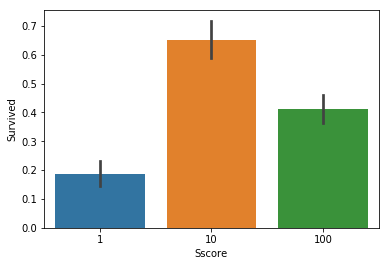

In [22]:
sns.barplot('Sscore','Survived',data=X_train)

In [23]:
X_test["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [24]:
Titles = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':4, 'Rev':5, 'Dr':6, 'Mme':7, 'Ms':8,
       'Major':9, 'Lady':10, 'Sir':11, 'Mlle':12, 'Col':13, 'Capt':14, 'the Countess':15,
       'Jonkheer':16, 'Dona':17}
X_train['title'] = X_train['title'].apply(lambda x: Titles[x])
X_test['title'] = X_test['title'].apply(lambda x: Titles[x])

In [25]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,#Cabins,title,AgeRange,Sscore,unaccompanied_minors,Ticket2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,2,0,1,1,0,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1,1,10,0,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,2,2,1,10,0,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,1,1,10,0,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,2,0,1,1,0,6


In [26]:
Y_train.shape

(891,)

In [27]:
X_train["Sex"] = X_train["Sex"].fillna("NA")
X_train["Embarked"] = X_train["Embarked"].fillna("NA")
X_train["Sex"] = X_train["Sex"].fillna("NA")
X_train["Embarked"] = X_train["Embarked"].fillna("NA")
X_train[['Pclass', 'Age', 'SibSp', 'Fare']] = X_train[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)

In [28]:
X_test["Sex"] = X_test["Sex"].fillna("NA")
X_test["Embarked"] = X_test["Embarked"].fillna("NA")
X_test["Sex"] = X_test["Sex"].fillna("NA")
X_test["Embarked"] = X_test["Embarked"].fillna("NA")
X_test[['Pclass', 'Age', 'SibSp', 'Fare']] = X_test[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)

Number of relatives

In [29]:
X_test["#Relatives"] = X_test['Parch'] + X_test['SibSp']
X_train["#Relatives"] = X_train['Parch'] + X_train['SibSp']

In [30]:
genders = {'male': 0, 'female': 1, 'NA': 2}
embarks = {'C': 0, 'Q': 1, 'S': 2, 'NA': 3}
X_train['Sex'] = X_train['Sex'].apply(lambda x: genders[x])
X_train['Embarked'] = X_train['Embarked'].apply(lambda x: embarks[x])

In [31]:
X_test['Sex'] = X_test['Sex'].apply(lambda x: genders[x])
X_test['Embarked'] = X_test['Embarked'].apply(lambda x: embarks[x])

In [32]:
X_train[pd.isnull(X_train).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,#Cabins,title,AgeRange,Sscore,unaccompanied_minors,Ticket2,#Relatives


In [33]:
X_train= X_train.drop(columns =['PassengerId', 'Cabin','Survived','Name', 'Ticket'] )

In [34]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#Cabins,title,AgeRange,Sscore,unaccompanied_minors,Ticket2,#Relatives
0,3,0,22.0,1,0,7.2500,2,2,0,1,1,0,9,1
1,1,1,38.0,1,0,71.2833,0,3,1,1,10,0,8,1
2,3,1,26.0,0,0,7.9250,2,2,2,1,10,0,16,0
3,1,1,35.0,1,0,53.1000,2,4,1,1,10,0,6,1
4,3,0,35.0,0,0,8.0500,2,2,0,1,1,0,6,0


In [35]:
trainX, testX, trainY, testY = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [55]:
LR = LogisticRegression().fit(trainX,trainY)
scores_rf=cross_val_score(LR,trainX,trainY,scoring='accuracy',cv=5)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
np.mean(scores_rf)

0.7978103806093018

In [57]:
yhat = LR.predict(testX)

In [58]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(testY, yhat)

0.776536312849162

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
from sklearn import metrics

In [61]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(trainX,trainY)
    yhat=neigh.predict(testX)
    mean_acc[n-1] = metrics.accuracy_score(testY, yhat)
  
    std_acc[n-1]=np.std(yhat==testY)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75977654, 0.73743017, 0.78212291, 0.74860335, 0.77094972,
       0.75977654, 0.74301676, 0.74301676, 0.73743017, 0.74301676,
       0.74301676, 0.73184358, 0.73184358, 0.72625698, 0.73184358,
       0.72067039, 0.70949721, 0.70391061, 0.70949721])

In [62]:
k = 11
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(trainX,trainY)
neigh

yhat = neigh.predict(testX)

scores_rf=cross_val_score(neigh,trainX,trainY,scoring='accuracy',cv=5)

neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [63]:
np.mean(scores_rf)

0.7444650045788792

In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,50,13),max_iter=10000,activation ='logistic',
                    solver='adam',learning_rate_init=0.001)
scores_rf=cross_val_score(mlp,trainX,trainY,scoring='accuracy',cv=5)
mlp.fit(trainX,trainY)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [65]:
np.mean(scores_rf)

0.806181871270274

In [66]:
yhat = mlp.predict(testX)

In [67]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(testY, yhat)

0.8212290502793296

# GridSearch

In [68]:
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,trainX,trainY,scoring='accuracy',cv=5)
model=GSRF.fit(trainX,trainY)

In [69]:
np.mean(scores_rf)

0.8315249728794829

# Predict

In [70]:
test_df= X_test.drop(columns =['PassengerId', 'Cabin','Name', 'Ticket'] )
test_df.columns
test_df[pd.isnull(test_df).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#Cabins,title,AgeRange,Sscore,unaccompanied_minors,Ticket2,#Relatives


In [71]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', '#Cabins',
       'title', 'AgeRange', 'Sscore', 'unaccompanied_minors', 'Ticket2',
       '#Relatives'],
      dtype='object')

In [72]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', '#Cabins',
       'title', 'AgeRange', 'Sscore', 'unaccompanied_minors', 'Ticket2',
       '#Relatives'],
      dtype='object')

In [73]:
final_predictions = LR.predict(test_df)
# final_predictions = mlp.predict(test_df)
# final_predictions = neigh.predict(test_df)
# final_predictions = model.predict(test_df)

In [74]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": final_predictions
    })
submission.to_csv('submission.csv', index=False)